Feature engineering complete. Shape: (20538, 39)


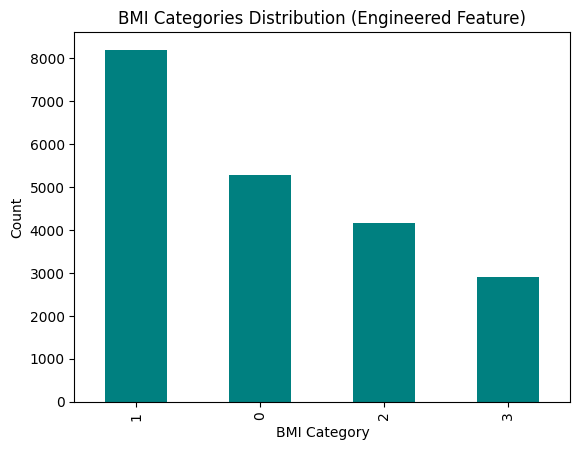

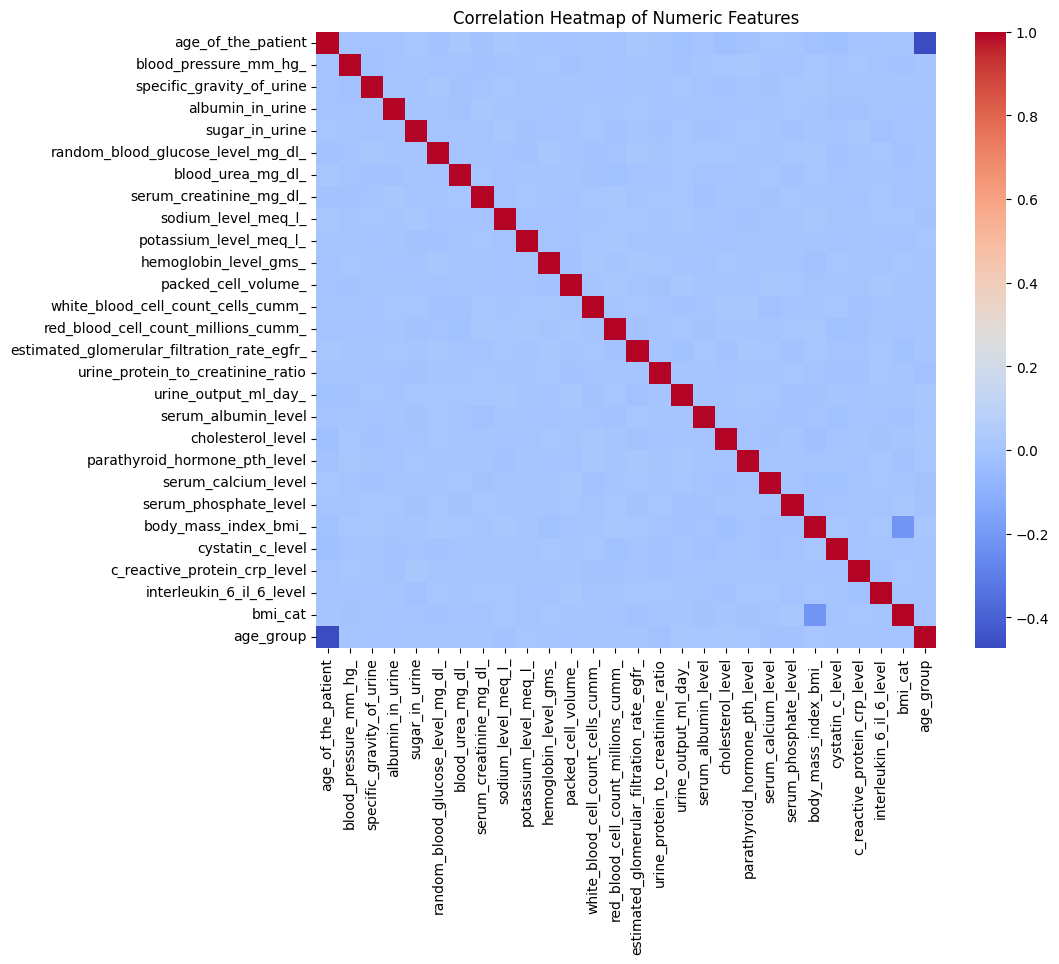

(20538, 39)
['age_of_the_patient', 'blood_pressure_mm_hg_', 'specific_gravity_of_urine', 'albumin_in_urine', 'sugar_in_urine', 'random_blood_glucose_level_mg_dl_', 'blood_urea_mg_dl_', 'serum_creatinine_mg_dl_', 'sodium_level_meq_l_', 'potassium_level_meq_l_', 'hemoglobin_level_gms_', 'packed_cell_volume_', 'white_blood_cell_count_cells_cumm_', 'red_blood_cell_count_millions_cumm_', 'estimated_glomerular_filtration_rate_egfr_', 'urine_protein_to_creatinine_ratio', 'urine_output_ml_day_', 'serum_albumin_level', 'cholesterol_level', 'parathyroid_hormone_pth_level', 'serum_calcium_level', 'serum_phosphate_level', 'body_mass_index_bmi_', 'cystatin_c_level', 'c_reactive_protein_crp_level', 'interleukin_6_il_6_level', 'red_blood_cells_in_urine', 'pus_cells_in_urine', 'pus_cell_clumps_in_urine', 'bacteria_in_urine', 'hypertension_yes_no_', 'diabetes_mellitus_yes_no_', 'coronary_artery_disease_yes_no_', 'anemia_yes_no_', 'family_history_of_chronic_kidney_disease', 'urinary_sediment_microscopy_

,age_of_the_patient,blood_pressure_mm_hg_,specific_gravity_of_urine,albumin_in_urine,sugar_in_urine,random_blood_glucose_level_mg_dl_,blood_urea_mg_dl_,serum_creatinine_mg_dl_,sodium_level_meq_l_,potassium_level_meq_l_,...,bacteria_in_urine,hypertension_yes_no_,diabetes_mellitus_yes_no_,coronary_artery_disease_yes_no_,anemia_yes_no_,family_history_of_chronic_kidney_disease,urinary_sediment_microscopy_results,target,bmi_cat,age_group
0,54,167,1.023,1,4,96,169.101369,7.55,146.068410,6.272576,...,not present,yes,yes,no,no,no,normal,No_Disease,2,2
1,42,127,1.023,3,2,73,183.223479,13.37,123.501427,5.611303,...,present,no,yes,no,yes,yes,abnormal,Low_Risk,0,0
2,38,148,1.016,0,0,77,193.141665,9.49,149.456527,3.965957,...,not present,no,no,yes,no,no,abnormal,No_Disease,1,0
3,7,98,1.017,4,0,225,125.939396,10.98,131.758843,4.980997,...,present,no,no,yes,yes,no,abnormal,No_Disease,0,3
4,67,174,1.015,1,1,376,197.188600,3.01,120.912465,4.097602,...,not present,no,no,no,yes,no,normal,No_Disease,3,2
5,14,92,1.006,4,2,371,132.802723,13.98,132.584281,3.835989,...,present,yes,no,no,yes,no,normal,No_Disease,0,3
6,9,156,1.010,2,0,255,186.928101,4.54,137.973337,4.420588,...,not present,yes,no,no,yes,no,abnormal,No_Disease,0,3
7,67,100,1.010,5,3,260,27.308196,8.73,120.531186,4.794412,...,present,no,no,yes,yes,yes,abnormal,No_Disease,1,2
8,42,138,1.017,4,4,352,169.656648,6.92,138.009505,5.103625,...,present,yes,no,no,yes,no,abnormal,No_Disease,0,0
9,23,127,1.020,2,4,196,37.503679,5.25,149.675547,5.460159,...,present,yes,no,no,no,yes,abnormal,No_Disease,1,3


In [1]:
# === Member E: Feature Engineering & Selection ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# === Setup ===
df = pd.read_csv("C:\\Users\\TUF\\OneDrive\\Desktop\\SLIIT 2Y1S\\AI and ML\\Project\\AIML_Project\\kidney_disease_dataset(S).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w]+', '_', regex=True)

# Keep only useful columns
useful_cols = [
    'age_of_the_patient','blood_pressure_mm_hg_','specific_gravity_of_urine','albumin_in_urine',
    'sugar_in_urine','random_blood_glucose_level_mg_dl_','blood_urea_mg_dl_','serum_creatinine_mg_dl_',
    'sodium_level_meq_l_','potassium_level_meq_l_','hemoglobin_level_gms_','packed_cell_volume_',
    'white_blood_cell_count_cells_cumm_','red_blood_cell_count_millions_cumm_',
    'estimated_glomerular_filtration_rate_egfr_','urine_protein_to_creatinine_ratio','urine_output_ml_day_',
    'serum_albumin_level','cholesterol_level','parathyroid_hormone_pth_level','serum_calcium_level',
    'serum_phosphate_level','body_mass_index_bmi_','cystatin_c_level','c_reactive_protein_crp_level',
    'interleukin_6_il_6_level','red_blood_cells_in_urine','pus_cells_in_urine','pus_cell_clumps_in_urine',
    'bacteria_in_urine','hypertension_yes_no_','diabetes_mellitus_yes_no_','coronary_artery_disease_yes_no_',
    'anemia_yes_no_','family_history_of_chronic_kidney_disease','urinary_sediment_microscopy_results','target'
]
df = df[useful_cols]

# === Feature Engineering ===
le = LabelEncoder()

# BMI categories
df["bmi_cat"] = pd.cut(df["body_mass_index_bmi_"], bins=[0,18.5,25,30,100],
                       labels=["Under","Normal","Over","Obese"])

# Age groups
df["age_group"] = pd.cut(df["age_of_the_patient"], bins=[0,30,50,70,200],
                         labels=["Young","Adult","Mid","Elder"])

# Encode engineered features
for col in ["bmi_cat","age_group"]:
    df[col] = le.fit_transform(df[col].astype(str))

print("Feature engineering complete. Shape:", df.shape)

# === EDA Visualization: BMI Categories ===
df["bmi_cat"].value_counts().plot(kind='bar', color='teal')
plt.title("BMI Categories Distribution (Engineered Feature)")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

# === Correlation Heatmap (Numeric Features) ===
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

print(df.shape)        # shows number of rows and columns
print(df.columns.tolist())  # lists all column names

df.head(10)
